<a href="https://colab.research.google.com/github/mobambas/Fine-Grained-Artwork-Classifier/blob/main/Artwork_Forgery_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Finetuning to Develop a Parameter-Efficient Neural Newtork Model for Forgery Detection in Artworks

**Author:** [Shriyansh Singh](https://github.com/mobambas), Neev Ashish Dattani

**Date created:** 10/06/2024

**Last modified:** 10/06/2024

**Description:** This project aims to accurately determine the authenticity of famous art paintings around the globe by using machine learning. In today's world, the exponentially accelerated expansion of computational notions and their endless potential, alongside which an increasing number of unexplored machine learning applications are unravelled, we have identified this problem statement as relevant and challenging. Currently, the detection of forgery or replicas in museums is done by examining the painting in fine-detail by an expert curator. Ongoing research on automated art-piece identification is limited. Through machine learning, we aim to identify if two paintings are painted by the same person, and thus verify their genuineness. We believe that our proposed solution for detecting forgery in art paintings holds interesting applications for curators, art historians, connoisseurs and art lovers. Through our project, not only can forgery be detected, but also the subtle similarities and variations between different artists can be found out, through the characteristics and style of their paintings identified via machine learning.

# EXPLORATORY DATA ANALYSIS (EDA) TASK | WEEK 1

**STEP 1)** Plotting the class distribution for the chosen dataset(s), and comparing the distributions if necessary.

**STEP 2)** Studying different categories and plotting sample images of some categories.

**STEP 3)** Qualitative and quantitative analysis to visualise the differentiability between categories through parametetric fine-grained image analysis.

First, we need to download the WikiArt dataset (since the dataset is in the croissant format, it is available to download in the Hugging Face model hub). If we don't have the datasets library installed, install it using the following command in your terminal.

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


Then download the dataset as follows:

In [ ]:
from datasets import load_dataset

wiki_art = load_dataset("huggan/wikiart", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/81444 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

**STEP 1)**

Plotting the class distributions:

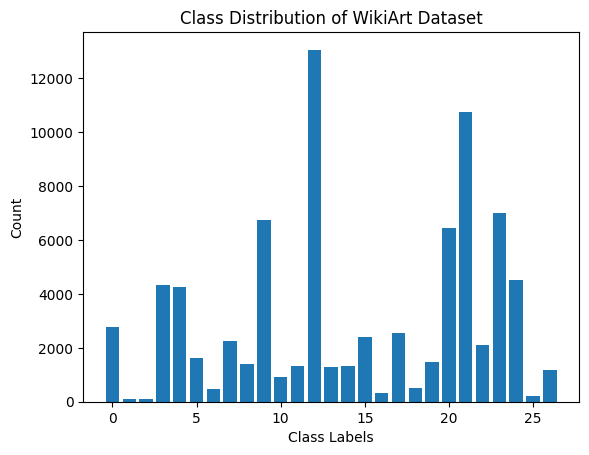

In [ ]:
import matplotlib.pyplot as plt

# Get the class labels and their counts
class_labels = wiki_art['style']
class_counts = []
for label in class_labels:
    class_counts.append((label, class_labels.count(label)))

# Plot the class distribution
plt.bar([x[0] for x in class_counts], [x[1] for x in class_counts])
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution of WikiArt Dataset')
plt.show()

**STEP 2)**

Studying different categories and plotting sample images as such:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import gc

# Get unique categories
categories = list(set(wiki_art['style']))
sample_size = 1  # Keep sample size small

# Function to resize images
def resize_image(image, new_size=(128, 128)):
    return Image.fromarray(np.array(image)).resize(new_size)

# Process categories in batches
batch_size = 5
num_batches = len(categories) // batch_size + (len(categories) % batch_size != 0)

for batch in range(num_batches):
    start_index = batch * batch_size
    end_index = min((batch + 1) * batch_size, len(categories))
    current_batch = categories[start_index:end_index]

    for category in current_batch:
        # Get indices of samples in the current category
        category_indices = [i for i, x in enumerate(wiki_art['style']) if x == category]

        # Sample the indices
        sample_indices = np.random.choice(category_indices, size=min(sample_size, len(category_indices)), replace=False)

        # Create a figure for the current category
        fig, axs = plt.subplots(1, sample_size, figsize=(15, 5))
        fig.suptitle(category)

        for j, index in enumerate(sample_indices):
            # Load, resize and plot each image individually to reduce memory usage
            img = wiki_art['image'][index]
            img_resized = resize_image(img)
            axs[j].imshow(img_resized)
            axs[j].axis('off')

        # Display the figure
        plt.show()

    # Clear memory
    gc.collect()
